In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, log_loss
from sklearn.calibration import calibration_curve, CalibratedClassifierCV


import warnings
warnings.filterwarnings('ignore')

### Первичное ознакомление с данными

In [3]:
data_main = pd.read_csv('datasets/ufc-master.csv')
data_main

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Duane Ludwig,Darren Elkins,-155.0,135.0,64.5161,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
6524,John Howard,Daniel Roberts,-210.0,175.0,47.6190,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
6525,Brendan Schaub,Chase Gormley,-260.0,220.0,38.4615,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
6526,Mike Pierce,Julio Paulino,-420.0,335.0,23.8095,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(*data_main.columns.to_list())

Сразу отберем только те признаки, которые:
 - кажутся наиболее значимыми для прогноза на основании личной экспертизы\
 - имеются в доступе для формирования запросов на прогноз

In [4]:
valuable_features = ['RedFighter',
                     'BlueFighter',                  
                     'WeightClass',
                     'Gender',
                     'Winner',
                     'Finish',
                     'NumberOfRounds',
                     'RedAge',
                     'RedHeightCms',
                     'RedReachCms',
                     'RedWeightLbs',
                     'RedStance',
                     'RedWins',
                     'RedWinsByDecisionMajority',
                     'RedWinsByDecisionSplit',
                     'RedWinsByDecisionUnanimous',
                     'RedWinsByKO',
                     'RedWinsByTKODoctorStoppage',
                     'RedWinsBySubmission',
                     'RedCurrentWinStreak',
                     'RedLosses',
                     'RedCurrentLoseStreak',
                     'RedAvgSigStrLanded',
                     'RedAvgSigStrPct',                     
                     'RedAvgSubAtt',
                     'RedAvgTDLanded',
                     'RedAvgTDPct',
                     'RedTotalRoundsFought',
                     'BlueAge',
                     'BlueHeightCms',
                     'BlueReachCms',
                     'BlueWeightLbs',
                     'BlueStance',
                     'BlueWins',
                     'BlueWinsByDecisionMajority',
                     'BlueWinsByDecisionSplit',
                     'BlueWinsByDecisionUnanimous',
                     'BlueWinsByKO',
                     'BlueWinsByTKODoctorStoppage',
                     'BlueWinsBySubmission',
                     'BlueCurrentWinStreak',
                     'BlueLosses', 
                     'BlueCurrentLoseStreak',                    
                     'BlueAvgSigStrLanded',                 # Среднее количество значимых ударов, выбрасываемых в минуту синим бойцом
                     'BlueAvgSigStrPct',                    # Соотношение значимых попаданий к общему количеству значимых ударов для синего бойца   
                     'BlueAvgSubAtt',                       # Среднее количесвто попыток болевого приема за 15 минут для синего бойца
                     'BlueAvgTDLanded',                     # Среднее количесвто тейкдаунов за 15 минут для синего бойца
                     'BlueAvgTDPct',                        # Соотношение успешных тейкдаунов к общему количеству попыток для синего бойца
                     'BlueTotalRoundsFought'
                    ]

data = data_main[valuable_features]
# data = data_main

Преобразуем некоторые признаки

Напишем функцию, которая будет объединять признаки `Winner` и `Finish` в один признак `Result`, который будет принимать одно из шести возможных значений 

In [5]:
def def_target(row):
    if row['Winner'] == 'Red':
        if row['Finish'] == 'KO/TKO':
            return 'Red-KO/TKO'
        elif row['Finish'] == 'SUB':
            return 'Red-Submission'
        else:
            return 'Red-Decision'
    if row['Winner'] == 'Blue':
        if row['Finish'] == 'KO/TKO':
            return 'Blue-KO/TKO'
        elif row['Finish'] == 'SUB':
            return 'Blue-Submission'
        else:
            return 'Blue-Decision'
        
data['Result'] = data.apply(def_target, axis=1)

Также объединим несколько признаков между собой для того, чтобы уменьшить количество признаков

In [6]:
data['RedWinsByDecision'] = data['RedWinsByDecisionMajority'] + data['RedWinsByDecisionSplit'] + data['RedWinsByDecisionUnanimous']
data['RedWinsByKO/TKO'] = data['RedWinsByKO'] + data['RedWinsByTKODoctorStoppage']

data['BlueWinsByDecision'] = data['BlueWinsByDecisionMajority'] + data['BlueWinsByDecisionSplit'] + data['BlueWinsByDecisionUnanimous']
data['BlueWinsByKO/TKO'] = data['BlueWinsByKO'] + data['BlueWinsByTKODoctorStoppage']

# Удалим лишние признаки
columns_to_drop = ['RedWinsByDecisionMajority',
                          'RedWinsByDecisionSplit',
                          'RedWinsByDecisionUnanimous',
                          'RedWinsByKO',
                          'RedWinsByTKODoctorStoppage',
                          'BlueWinsByDecisionMajority',
                          'BlueWinsByDecisionSplit',
                          'BlueWinsByDecisionUnanimous',
                          'BlueWinsByKO',
                          'BlueWinsByTKODoctorStoppage',
                          'Winner',
                          'Finish'
                        #   'RedWeightLbs',
                        #   'BlueWeightLbs'                          
                    ]

data = data.drop(columns=columns_to_drop, axis=1)

### Работа с признаками

Бинарные и ориднильные признаки можно преобразовать в числовой вид 

In [7]:
binary_features = ['Gender', 'NumberOfRounds', 'RedStance', 'BlueStance']
data['Gender'] = data['Gender'].map({'FEMALE': 0, 'MALE': 1})
data['NumberOfRounds'] = data['NumberOfRounds'].map({3: 0, 5: 1})
data['RedStance'] = data['RedStance'].map({'Southpaw': 0, 'Orthodox': 1})
data['BlueStance'] = data['BlueStance'].map({'Southpaw': 0, 'Orthodox': 1})

ordinal_features = ['WeightClass', 'Result']
data['WeightClass'] = data['WeightClass'].map({"Women's Strawweight": 0,
                                               'Flyweight': 0,
                                               "Women's Flyweight": 0,
                                               'Bantamweight': 1,
                                               "Women's Bantamweight": 1,
                                               'Featherweight': 2,
                                               "Women's Featherweight": 2,
                                               'Catch Weight': 2,
                                               'Lightweight': 3,
                                               'Welterweight': 4,
                                               'Middleweight': 5,
                                               'Light Heavyweight': 6,
                                               'Heavyweight': 7})

data['Result'] = data['Result'].map({'Red-KO/TKO': 0,
                                     'Red-Submission': 1,
                                     'Red-Decision': 2,
                                     'Blue-KO/TKO': 3,
                                     'Blue-Submission' : 4,
                                     'Blue-Decision': 5                                     
                                    })

Заполнение пропусков

In [ ]:
data.info()

In [8]:
for col in data.columns:
    isna_sum = 0
    if data[col].isna().any():
        isna_sum = data[col].isna().sum()
        print(f'{col}: {isna_sum}')

NumberOfRounds: 21
RedStance: 375
RedAvgSigStrLanded: 455
RedAvgSigStrPct: 357
RedAvgSubAtt: 357
RedAvgTDLanded: 357
RedAvgTDPct: 367
BlueStance: 410
BlueAvgSigStrLanded: 930
BlueAvgSigStrPct: 765
BlueAvgSubAtt: 832
BlueAvgTDLanded: 833
BlueAvgTDPct: 842


In [9]:
data['NumberOfRounds'] = data['NumberOfRounds'].fillna(0)
data['RedStance'] = data['RedStance'].fillna(1)
data['BlueStance'] = data['BlueStance'].fillna(1)

In [13]:
# colmns_with_nans = ['RedAvgSigStrLanded',
#                     'RedAvgSigStrPct',
#                     'RedAvgSubAtt',
#                     'RedAvgTDLanded',
#                     'RedAvgTDPct',
#                     'BlueAvgSigStrLanded',
#                     'BlueAvgSigStrPct',
#                     'BlueAvgSubAtt',
#                     'BlueAvgTDLanded',
#                     'BlueAvgTDPct'
#                     ]

# df_fillna_vals = data.groupby(by='WeightClass')[colmns_with_nans].mean().reset_index()
# for col in colmns_with_nans:
#     for i in range(8):
#         data.loc[(data['WeightClass'] == i) & (data[col].isna()), col] = df_fillna_vals.loc[i, col]

От пропусков в данных избавились. Теперь посмотрим на наличие выбросов

In [ ]:
data.describe()

Построим boxplot для признаков со статистическими данными бойцов

In [11]:
stats_columns = ['RedAvgSigStrLanded',
                'BlueAvgSigStrLanded',
                'RedAvgSigStrPct',
                'BlueAvgSigStrPct',
                'RedAvgSubAtt',
                'BlueAvgSubAtt',
                'RedAvgTDLanded',
                'BlueAvgTDLanded',
                'RedAvgTDPct',
                'BlueAvgTDPct'
                ]             
                  
# fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(14, 14))
# for i in range(len(stats_columns)):
#     axs[int(i // 4), i % 4].boxplot(data[stats_columns[i]])
#     axs[int(i // 4), i % 4].set_title(stats_columns[i])

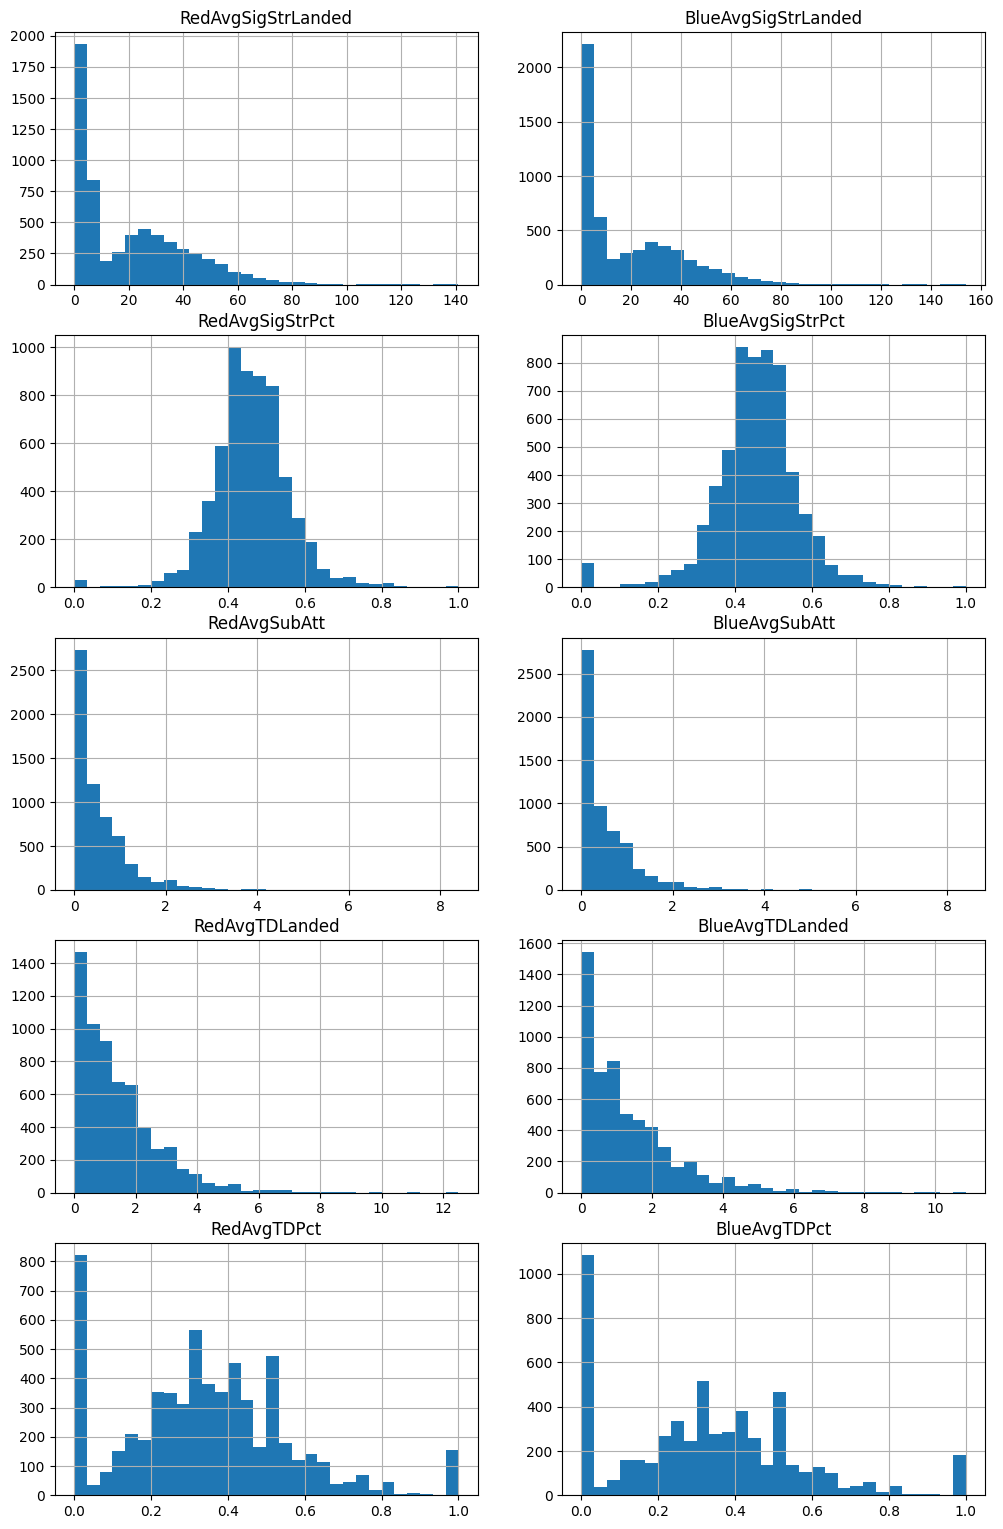

In [12]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 19))
for i in range(len(stats_columns)):
    axs[int(i // 2), i % 2].hist(data[stats_columns[i]], bins=30)
    axs[int(i // 2), i % 2].set_title(stats_columns[i])
    axs[int(i // 2), i % 2].grid()

Посмотрим на признаки более пристально. Похоже что они содержат аномальные значения

In [ ]:
data[stats_columns].describe()

Возьмем одного бойца и посмотрим признаки, описывающие его статистики

In [ ]:
data[data['BlueFighter'] == 'Yan Xiaonan'][['BlueFighter'] + stats_columns[1::2]]

In [ ]:
data.groupby(by='RedFighter')[stats_columns[0::2]].median().reset_index()

In [ ]:
data[data['RedFighter'] == 'Zubaira Tukhugov'][['RedFighter'] + stats_columns[0::2]]

Видно, что многие данные (особенно данные о более давнишних боях) содержат аномальные значения. Поскольку данные упорядочены во времени, можно попробовать определить границу, после которой начинают появляться аномальные значения

In [ ]:
df_replace_outbursts = data.iloc[:1500, :].groupby(by='WeightClass')[stats_columns].mean().reset_index()
df_replace_outbursts

In [ ]:
df_replace_outbursts = data.iloc[:2500, :].groupby(by='WeightClass')[stats_columns].mean().reset_index()
df_replace_outbursts

Примерно после 2500 тысяч строчек в данных начинается полный хаос, ликвидировать который нет никакой возможности. Поэтому оставим только первые 2500 тысячи строк. Пожертвуем данными ради качества.

### Работа с уменьшенной выборкой

In [13]:
data_reduced = data_main.iloc[:2000, :]
# data_reduced = data_main

Таким образом видим, что оставшиеся данные охватывают период за последние 5 лет

In [14]:
# Уменьшаем количество используемых признаков
data = data_reduced[valuable_features]
# data = data_reduced

# Создаем новый столбец с целевой переменной
data.loc[:, 'Result'] = data.apply(def_target, axis=1)
# Обединяем 
data.loc[:, 'RedWinsByDecision'] = data['RedWinsByDecisionMajority'] + data['RedWinsByDecisionSplit'] + data['RedWinsByDecisionUnanimous']
data.loc[:, 'RedWinsByKO/TKO'] = data['RedWinsByKO'] + data['RedWinsByTKODoctorStoppage']

data.loc[:, 'BlueWinsByDecision'] = data['BlueWinsByDecisionMajority'] + data['BlueWinsByDecisionSplit'] + data['BlueWinsByDecisionUnanimous']
data.loc[:, 'BlueWinsByKO/TKO'] = data['BlueWinsByKO'] + data['BlueWinsByTKODoctorStoppage']

# Удалим лишние признаки
data = data.drop(columns=columns_to_drop, axis=1)

In [27]:
# data['Result'].value_counts(normalize=True)

In [15]:
# Преобразуем бинарные и ординальные признаки в числовой вид
binary_features = ['Gender', 'NumberOfRounds', 'RedStance', 'BlueStance']
data['Gender'] = data['Gender'].map({'FEMALE': 0, 'MALE': 1})
data['NumberOfRounds'] = data['NumberOfRounds'].map({3: 1, 5: 0})
data['RedStance'] = data['RedStance'].map({'Southpaw': 0, 'Orthodox': 1})
data['BlueStance'] = data['BlueStance'].map({'Southpaw': 0, 'Orthodox': 1})

ordinal_features = ['WeightClass', 'Result']
data['WeightClass'] = data['WeightClass'].map({"Women's Strawweight": 0,
                                               'Flyweight': 0,
                                               "Women's Flyweight": 0,
                                               'Bantamweight': 1,
                                               "Women's Bantamweight": 1,
                                               'Featherweight': 2,
                                               "Women's Featherweight": 2,
                                               'Catch Weight': 2,
                                               'Lightweight': 3,
                                               'Welterweight': 4,
                                               'Middleweight': 5,
                                               'Light Heavyweight': 6,
                                               'Heavyweight': 7})

data['Result'] = data['Result'].map({'Red-Decision': 0,
                                     'Blue-Decision': 1, 
                                     'Red-KO/TKO': 2,
                                     'Blue-KO/TKO': 3,
                                     'Red-Submission': 4,                                     
                                     'Blue-Submission' : 5                                                                         
                                    })

In [16]:
for col in data.columns:
    isna_sum = 0
    if data[col].isna().any():
        isna_sum = data[col].isna().sum()
        print(f'{col}: {isna_sum}')

RedStance: 216
BlueStance: 204


In [17]:
data['RedStance'] = data['RedStance'].fillna(1)
data['BlueStance'] = data['BlueStance'].fillna(1)

colmns_with_nans = ['RedAvgSigStrLanded',                    
                    'RedAvgTDPct',
                    'BlueAvgSigStrLanded',
                    'BlueAvgTDLanded',
                    'BlueAvgTDPct'
                    ]

# df_fillna_vals = data.groupby(by='WeightClass')[colmns_with_nans].mean().reset_index()
# for col in colmns_with_nans:
#     for i in range(8):
#         data.loc[(data['WeightClass'] == i) & (data[col].isna()), col] = df_fillna_vals.loc[i, col]

### Промежуточные графики распределения признаков

In [ ]:
ig, axs = plt.subplots(nrows=3, ncols=4, figsize=(14, 14))
for i in range(len(stats_columns)):
    axs[int(i // 4), i % 4].boxplot(data[stats_columns[i]])
    axs[int(i // 4), i % 4].set_title(stats_columns[i])

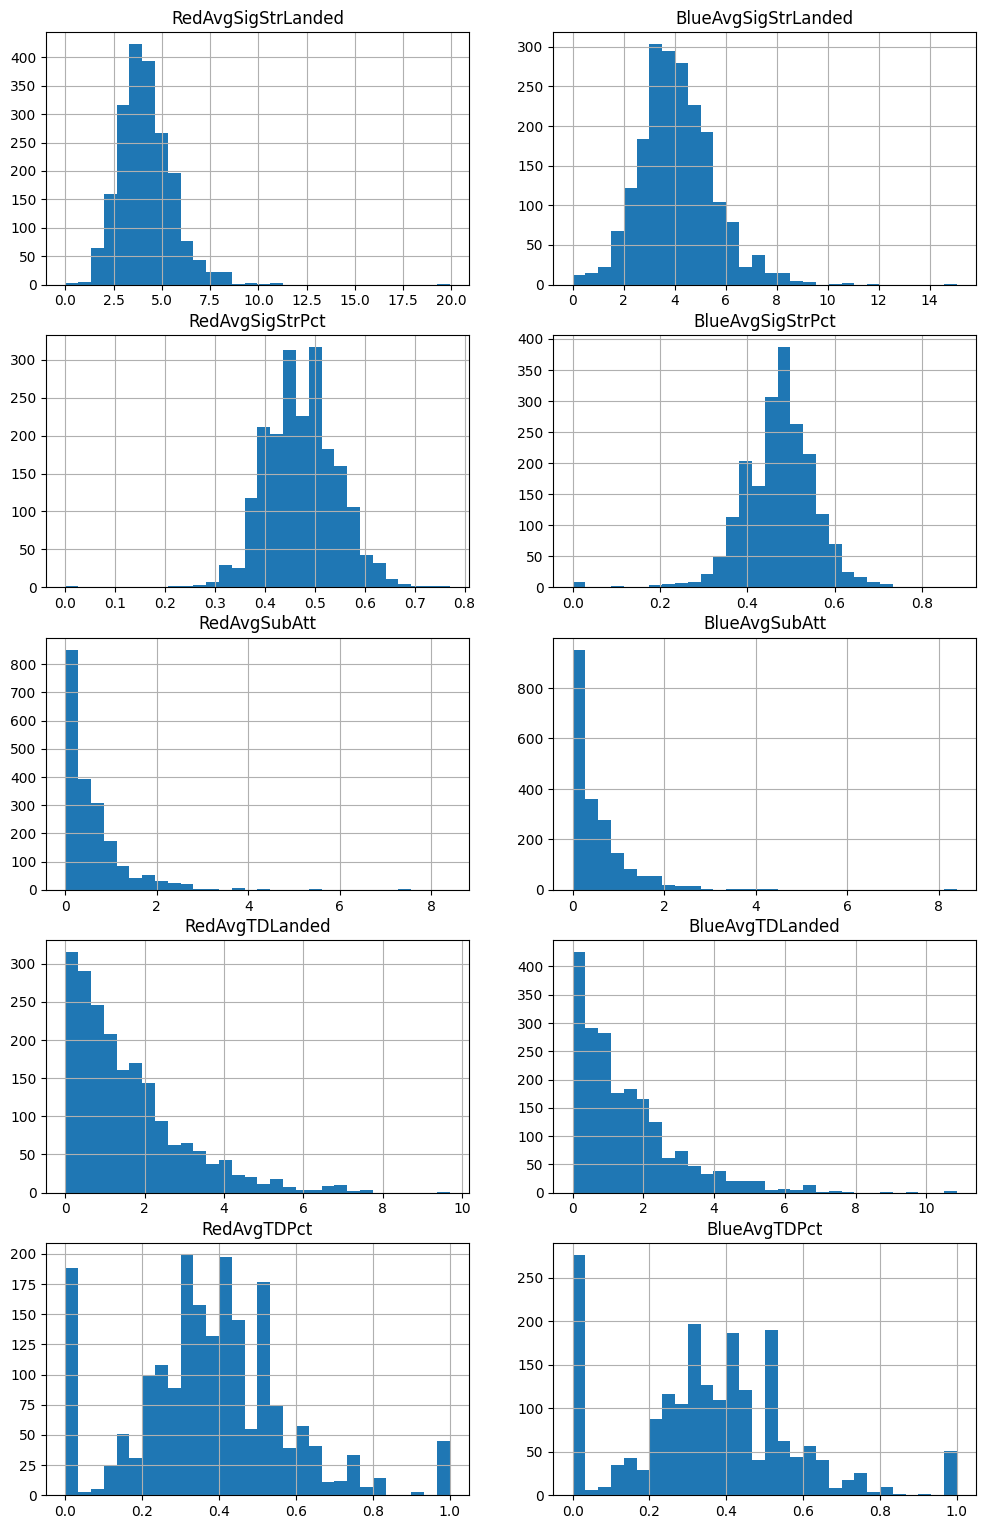

In [18]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 19))
for i in range(len(stats_columns)):
    axs[int(i // 2), i % 2].hist(data[stats_columns[i]], bins=30)
    axs[int(i // 2), i % 2].set_title(stats_columns[i])
    axs[int(i // 2), i % 2].grid()

Теперь посмотрим на наличие корреляций

In [ ]:
red_fighter_features = [col for col in data.columns if 'Red' in col]
# Добавим к рассмотрению целевую переменную
red_fighter_features.append('Result')
# Выберем из датасета только те бои, где победил красный боец
data_red = data[data['Result'].isin([0, 1, 2])]

corr_matrix = data_red[red_fighter_features[1:]].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
data.describe()

Посмотрим на распределение классов целевой переменной

In [ ]:
data['Result'].value_counts(normalize='True')

### Преобразование данных для обучения модели

In [46]:
def remove_rows_with_outliers(df, columns=None):
    
    # Если columns=None, выбрать все числовые столбцы
    if columns is None:
        columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Создать маску для строк без аномалий
    # mask = ~df[columns].apply(lambda x: np.abs(x - x.mean()) > (2 * x.std()), axis=0).any(axis=1)
    
    # Альтернативный способ с использованием IQR
    mask = ~df[columns].apply(lambda x:  
                                (x > (x.quantile(0.75) + 3.5 * (x.quantile(0.75) - x.quantile(0.25))))).any(axis=1)

    # Возвращаем датафрейм с удаленными строками, содержащими аномалии
    return mask

# (x < (x.quantile(0.25) - 3 * (x.quantile(0.75) - x.quantile(0.25)))) |

In [37]:
features_quntiles = {}

def replace_outliers_with_nearest_quantile(df, columns ,is_test=False): 
    if not is_test:
        global features_quntiles
           
        for column_name in columns:            
            # Рассчитать первый и третий квартили
            q1 = df[column_name].quantile(0.25)
            q3 = df[column_name].quantile(0.75)
            
            # Рассчитать межквантильный диапазон (IQR)
            iqr = q3 - q1
            
            # Определить нижнюю и верхнюю границы для аномалий
            lower_bound = q1 - 5 * iqr
            upper_bound = q3 + 5 * iqr

            features_quntiles[column_name] = [q1, q3, lower_bound, upper_bound]
            
            # Заменить аномальные значения на ближайший квантиль
            df.loc[df[column_name] < lower_bound, column_name] = q1
            df.loc[df[column_name] > upper_bound, column_name] = q3

    else:
        for column_name in columns: 
            df.loc[df[column_name] < features_quntiles[column_name][2], column_name] = features_quntiles[column_name][0]
            df.loc[df[column_name] > features_quntiles[column_name][3], column_name] = features_quntiles[column_name][1]

    
    return df

In [19]:
for col in data.columns:
    isna_sum = 0
    if data[col].isna().any():
        isna_sum = data[col].isna().sum()
        print(f'{col}: {isna_sum}')

In [47]:
X = data.drop(columns=['Result', 'RedFighter', 'BlueFighter'], axis=1)
y = data['Result']


test_size = int(len(X)*0.1)
X_train = X.iloc[test_size:, :]

# numeric_columns = X_train.select_dtypes(include='number').columns.tolist()
mask= remove_rows_with_outliers(X_train, stats_columns)
y_train = y.iloc[test_size:]
X_train = X_train[mask]
y_train = y_train[mask]
X_test = X.iloc[:test_size, :]
# X_test = replace_outliers_with_nearest_quantile(X_test, stats_columns, is_test=True)
y_test = y.iloc[:test_size]

In [48]:
X_train

,WeightClass,Gender,NumberOfRounds,RedAge,RedHeightCms,RedReachCms,RedWeightLbs,RedStance,RedWins,RedWinsBySubmission,...,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueTotalRoundsFought,RedWinsByDecision,RedWinsByKO/TKO,BlueWinsByDecision,BlueWinsByKO/TKO
200,1,1,1,27,170.18,177.80,135,0.0,3,2,...,5.64,0.43,0.0,2.00,0.26,6,0,1,1,0
201,0,1,1,23,170.18,177.80,125,1.0,6,4,...,4.44,0.53,0.4,0.54,0.33,14,2,0,2,2
202,4,1,1,26,182.88,182.88,170,1.0,2,0,...,3.50,0.51,2.4,3.53,0.36,10,2,0,2,0
203,6,1,1,30,190.50,198.12,205,1.0,3,0,...,5.57,0.54,0.0,0.15,0.20,20,2,1,3,1
205,7,1,1,28,193.04,200.66,265,1.0,4,1,...,4.90,0.50,0.5,0.46,0.50,13,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,1,1,36,187.96,190.50,170,1.0,13,4,...,3.81,0.54,1.5,1.60,0.47,58,3,6,2,11
1996,4,1,1,34,182.88,185.42,170,1.0,9,0,...,4.51,0.42,0.0,1.32,0.39,32,4,5,3,6
1997,5,1,1,26,177.80,193.04,185,0.0,2,0,...,3.25,0.40,0.0,1.66,0.45,21,0,2,2,1
1998,5,1,1,28,180.34,182.88,185,0.0,2,0,...,8.04,0.67,0.0,0.65,0.06,5,1,1,1,1


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.59      0.54        66
           1       0.49      0.51      0.50        49
           2       0.42      0.45      0.44        31
           3       0.11      0.05      0.07        19
           4       0.28      0.29      0.29        17
           5       0.50      0.28      0.36        18

    accuracy                           0.45       200
   macro avg       0.38      0.36      0.36       200
weighted avg       0.43      0.45      0.43       200

Confusion Matrix:


Text(0.5, 23.52222222222222, 'predicted value')

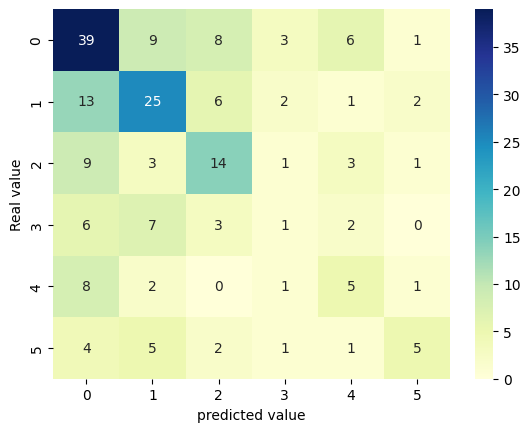

In [51]:
pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', MinMaxScaler()),
                     ('classifier', LogisticRegression(multi_class='multinomial', random_state=8))
                     ])

# Обучаем pipeline на тренировочных данных
pipeline.fit(X_train, y_train)

# Делаем прогнозы на тестовых данных
y_pred = pipeline.predict(X_test)

# Выводим метрики качества модели
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,  annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Real value')
plt.xlabel('predicted value')

### Упростим задачу. Бинарная классификация

In [80]:
from copy import deepcopy

data_binary = deepcopy(data)
data_binary['Result'] = data['Result'].isin([1, 3, 5]).astype(int)
data_binary.to_csv('ufc-master-for-binary-classification.csv')
data_binary

,RedFighter,BlueFighter,WeightClass,Gender,NumberOfRounds,RedAge,RedHeightCms,RedReachCms,RedWeightLbs,RedStance,...,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueTotalRoundsFought,Result,RedWinsByDecision,RedWinsByKO/TKO,BlueWinsByDecision,BlueWinsByKO/TKO
0,Alexandre Pantoja,Kai Asakura,0,1,0,34,165.10,170.18,125,1.0,...,0.00,0.0,0.00,0.00,0,0,6,2,0,0
1,Shavkat Rakhmonov,Ian Machado Garry,4,1,1,30,185.42,195.58,170,1.0,...,0.55,0.3,0.77,0.55,20,0,0,1,5,3
2,Ciryl Gane,Alexander Volkov,7,1,1,34,193.04,205.74,245,1.0,...,0.57,0.2,0.45,0.63,44,0,3,4,5,6
3,Bryce Mitchell,Kron Gracie,2,1,1,30,177.80,177.80,145,0.0,...,0.44,0.5,0.47,0.25,7,0,6,0,0,0
4,Nate Landwehr,Dooho Choi,2,1,1,36,175.26,182.88,145,1.0,...,0.53,0.8,0.75,0.37,15,1,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Carlos Condit,Matt Brown,4,1,1,36,187.96,190.50,170,1.0,...,0.54,1.5,1.60,0.47,58,0,3,6,2,11
1996,Santiago Ponzinibbio,Li Jingliang,4,1,1,34,182.88,185.42,170,1.0,...,0.42,0.0,1.32,0.39,32,1,4,5,3,6
1997,Joaquin Buckley,Alessio Di Chirico,5,1,1,26,177.80,193.04,185,0.0,...,0.40,0.0,1.66,0.45,21,1,0,2,2,1
1998,Punahele Soriano,Dusko Todorovic,5,1,1,28,180.34,182.88,185,0.0,...,0.67,0.0,0.65,0.06,5,0,1,1,1,1


In [81]:
X = data_binary.drop(columns=['Result', 
                              'RedFighter', 
                              'BlueFighter' 
                            #   'WeightClass', 
                              # 'RedStance', 
                              # 'BlueStance',
                              # 'RedAvgSigStrLanded',
                              # 'BlueAvgSigStrLanded'
                              ], axis=1)
y = data_binary['Result']
X_train = X.iloc[test_size:, :]
# X_train = replace_outliers_with_nearest_quantile(X_train, stats_columns)
# numeric_columns = X_train.select_dtypes(include='number').columns.tolist()
mask= remove_rows_with_outliers(X_train, stats_columns)
y_train = y.iloc[test_size:]
X_train = X_train[mask]
y_train = y_train[mask]
X_test = X.iloc[:test_size, :]
# X_test = replace_outliers_with_nearest_quantile(X_test, stats_columns, is_test=True)
y_test = y.iloc[:test_size]

In [83]:
X_to_export = pd.concat([X_train, X_test], axis=0)
X_to_export.to_csv('X_1964.csv')

y_to_export = pd.concat([y_train, y_test], axis=0)
y_to_export.to_csv('y_1964.csv')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/home/neuralist/DS&ML/Data_Science/MIPT_Data_Scientist/DA & ML/UFC-predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/neuralist/DS&ML/Data_Science/MIPT_Data_Scientist/DA & ML/UFC-predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/neuralist/DS&ML/Data_Science/MIPT_Data_Scientist/DA & ML/UFC-predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/neuralist/DS&ML/Data_Science/MIPT_Data_Scientist/DA & ML/UFC-predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/neuralist/DS&M

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       114
           1       0.64      0.67      0.66        86

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.69      0.70       200



Text(0.5, 23.52222222222222, 'predicted value')

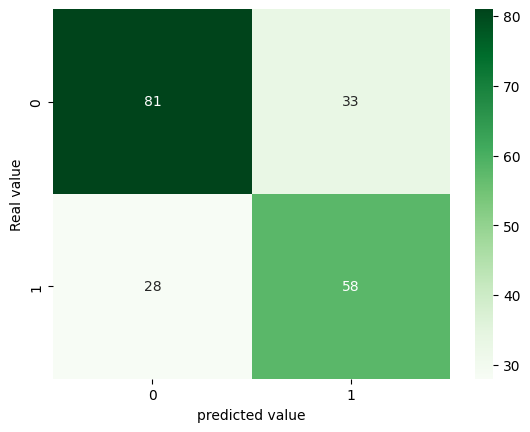

In [55]:
pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                     ('scaler', MinMaxScaler()),
                     ('logreg', LogisticRegression(max_iter=1000))
                     ])

params = {'logreg__penalty': [None, 'l1', 'l2'],
          'logreg__C': np.linspace(0.001, 10000, 24),
          'logreg__solver': ['liblinear', 'lbfgs', 'newton-cs'],
          'logreg__class_weight': ['none', 'balanced'],
          'logreg__fit_intercept': [True, False]}

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)

gs_binary = GridSearchCV(estimator=pipeline, param_grid=params, cv=folds, scoring='f1', verbose=True, n_jobs=-1)

# Обучаем pipeline на тренировочных данных
gs_binary.fit(X_train, y_train)

# Делаем прогнозы на тестовых данных
y_pred = gs_binary.predict(X_test)

# Выводим метрики качества модели
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок

sns.heatmap(confusion_matrix(y_test, y_pred),  annot=True, fmt="d", cmap='Greens')
plt.ylabel('Real value')
plt.xlabel('predicted value')

In [56]:
gs_binary.best_params_

{'logreg__C': 434.7835652173913,
 'logreg__class_weight': 'balanced',
 'logreg__fit_intercept': True,
 'logreg__penalty': 'l2',
 'logreg__solver': 'lbfgs'}

In [57]:
# Предсказание вероятностей
y_proba = gs_binary.predict_proba(X_test)

# Создание датафрейма для хранения результатов
results_df = pd.DataFrame({
    'RedFighter': data_binary['RedFighter'].iloc[:test_size],
    'BlueFighter': data_binary['BlueFighter'].iloc[:test_size],
    'ProbabilityRedWins': y_proba [:, 0],
    'ProbabilityBlueWins': y_proba [:, 1],
    'ActualWinner': data_binary['Result'].iloc[:test_size]
})

# for i in range(len(X_test)):
#     print(f"Вероятность победы {data_binary.loc[i, 'RedFighter']}: {y_proba[i][0] * 100:.2f}% Вероятность победы {data_binary.loc[i, 'BlueFighter']}: {y_proba[i][1] * 100:.2f}%")


# # Метрики
# print("Log Loss:", log_loss(y_test, y_proba))
# print("ROC-AUC:", roc_auc_score(y_test, y_proba[:, 1]))
results_df

,RedFighter,BlueFighter,ProbabilityRedWins,ProbabilityBlueWins,ActualWinner
0,Alexandre Pantoja,Kai Asakura,0.978625,0.021375,0
1,Shavkat Rakhmonov,Ian Machado Garry,0.366447,0.633553,0
2,Ciryl Gane,Alexander Volkov,0.529549,0.470451,0
3,Bryce Mitchell,Kron Gracie,0.818639,0.181361,0
4,Nate Landwehr,Dooho Choi,0.515707,0.484293,1
...,...,...,...,...,...
195,King Green,Paddy Pimblett,0.380963,0.619037,1
196,Christian Leroy Duncan,Gregory Rodrigues,0.346137,0.653863,1
197,Arnold Allen,Giga Chikadze,0.641390,0.358610,0
198,Nathaniel Wood,Daniel Pineda,0.779839,0.220161,0


### Разбираемся с вероятностями

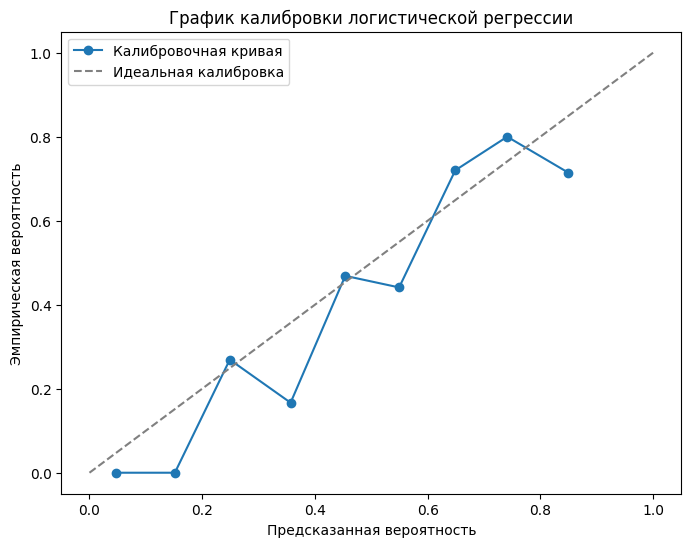

In [58]:
# Калибровочная кривая
y_proba_positive = y_proba[:, 1]  # Вероятности положительного класса
prob_true, prob_pred = calibration_curve(y_test, y_proba_positive, n_bins=10, strategy="uniform")

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Калибровочная кривая')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Идеальная калибровка')
plt.xlabel('Предсказанная вероятность')
plt.ylabel('Эмпирическая вероятность')
plt.title('График калибровки логистической регрессии')
plt.legend()

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       114
           1       0.75      0.59      0.66        86

    accuracy                           0.74       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.74      0.74      0.73       200



Text(0.5, 23.52222222222222, 'predicted value')

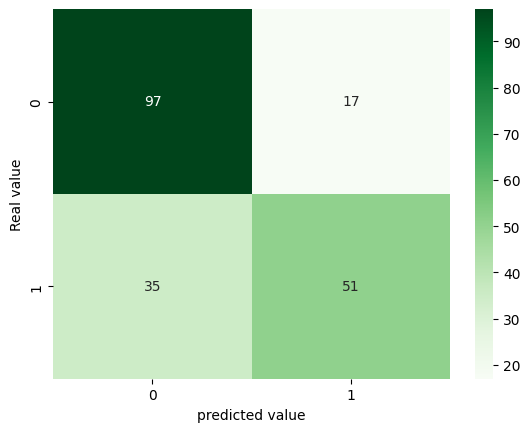

In [59]:
from sklearn.calibration import CalibratedClassifierCV

model = gs_binary.best_estimator_
# Предсказываем вероятности
y_proba_positive = y_proba[:, 1]  # Вероятности положительного класса
calibrated_model = CalibratedClassifierCV(estimator=model, method='isotonic', cv='prefit')
calibrated_model.fit(X_test, y_test)
# Предсказанные вероятности после калибровки
calibrated_proba = calibrated_model.predict_proba(X_test)[:, 1]
# # Калибровочная кривая
prob_true, prob_pred = calibration_curve(y_test, calibrated_proba, n_bins=10, strategy="uniform")

y_pred_calibrated = calibrated_model.predict(X_test)
# Выводим метрики качества модели
print("Classification Report:")
print(classification_report(y_test, y_pred_calibrated))

# Матрица ошибок

sns.heatmap(confusion_matrix(y_test, y_pred_calibrated),  annot=True, fmt="d", cmap='Greens')
plt.ylabel('Real value')
plt.xlabel('predicted value')

In [60]:
# Предсказанные вероятности после калибровки
calibrated_proba = calibrated_model.predict_proba(X_test)

# Создание датафрейма для хранения результатов
results_df = pd.DataFrame({
    'RedFighter': data_binary['RedFighter'].iloc[:test_size],
    'BlueFighter': data_binary['BlueFighter'].iloc[:test_size],
    'ProbabilityRedWins': calibrated_proba [:, 0],
    'ProbabilityBlueWins': calibrated_proba [:, 1],
    'ActualWinner': data_binary['Result'].iloc[:test_size]
})

results_df.iloc[0:30, :]

,RedFighter,BlueFighter,ProbabilityRedWins,ProbabilityBlueWins,ActualWinner
0,Alexandre Pantoja,Kai Asakura,1.000000,0.000000,0
1,Shavkat Rakhmonov,Ian Machado Garry,0.347826,0.652174,0
2,Ciryl Gane,Alexander Volkov,0.615385,0.384615,0
3,Bryce Mitchell,Kron Gracie,1.000000,0.000000,0
4,Nate Landwehr,Dooho Choi,0.558824,0.441176,1
5,Dominick Reyes,Anthony Smith,0.764706,0.235294,0
6,Vicente Luque,Themba Gorimbo,0.205128,0.794872,0
7,Movsar Evloev,Aljamain Sterling,0.820513,0.179487,0
8,Randy Brown,Bryan Battle,0.347826,0.652174,1
9,Chris Weidman,Eryk Anders,0.820513,0.179487,1


In [ ]:
# Извлекаем scaler из пайплайна
scaler = pipeline.named_steps['scaler']

# Применяем scaler к данным
processed_data = scaler.fit_transform(X_train)
scaled_df = pd.DataFrame(processed_data, columns=X_train.columns)
# Выводим обработанные данные
scaled_df

### Создание новых признаков

In [61]:
X_featured = deepcopy(X)

In [62]:
X_featured

,WeightClass,Gender,NumberOfRounds,RedAge,RedHeightCms,RedReachCms,RedWeightLbs,RedStance,RedWins,RedWinsBySubmission,...,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueTotalRoundsFought,RedWinsByDecision,RedWinsByKO/TKO,BlueWinsByDecision,BlueWinsByKO/TKO
0,0,1,0,34,165.10,170.18,125,1.0,12,4,...,0.00,0.00,0.0,0.00,0.00,0,6,2,0,0
1,4,1,1,30,185.42,195.58,170,1.0,6,5,...,5.50,0.55,0.3,0.77,0.55,20,0,1,5,3
2,7,1,1,34,193.04,205.74,245,1.0,9,2,...,5.13,0.57,0.2,0.45,0.63,44,3,4,5,6
3,2,1,1,30,177.80,177.80,145,0.0,7,1,...,3.74,0.44,0.5,0.47,0.25,7,6,0,0,0
4,2,1,1,36,175.26,182.88,145,1.0,5,2,...,4.41,0.53,0.8,0.75,0.37,15,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,1,1,36,187.96,190.50,170,1.0,13,4,...,3.81,0.54,1.5,1.60,0.47,58,3,6,2,11
1996,4,1,1,34,182.88,185.42,170,1.0,9,0,...,4.51,0.42,0.0,1.32,0.39,32,4,5,3,6
1997,5,1,1,26,177.80,193.04,185,0.0,2,0,...,3.25,0.40,0.0,1.66,0.45,21,0,2,2,1
1998,5,1,1,28,180.34,182.88,185,0.0,2,0,...,8.04,0.67,0.0,0.65,0.06,5,1,1,1,1


In [63]:
# Создаем новые признаки
def create_new_features(df):    
    df['Age_diff'] = df['RedAge'] - df['BlueAge']
    df['Height_diff'] = df['RedHeightCms'] - df['BlueHeightCms']
    df['Reach_diff'] = df['RedReachCms'] - df['BlueReachCms']
    df['Weight_diff'] = df['RedWeightLbs'] - df['BlueWeightLbs']
    df['Red_wins_loss_diff'] = df['RedWins'] - df['RedLosses']
    df['Blue_wins_loss_diff'] = df['BlueWins'] - df['BlueLosses']
    df['Red_Blue_Wins_diff'] = df['RedWins'] - df['BlueWins']
    df['Red_Blue_Loss_diff'] = df['RedLosses'] - df['BlueLosses']
    # Находим разницу между числом побед-поражений для обоих бойцов
    df['Red_Blue_wins_loss_diff'] = df['Red_wins_loss_diff'] - df['Blue_wins_loss_diff']
    return df

# Находим разницу в текущих сериях побед/поражений для двух бойцов
def red_blue_streak_diff_calc(row):
    if row['RedCurrentWinStreak'] > 0: 
        if row['BlueCurrentWinStreak'] > 0:
            return row['RedCurrentWinStreak'] - row['BlueCurrentWinStreak']
        else:
            return row['RedCurrentWinStreak'] + row['BlueCurrentLoseStreak']
    else:
        if row['BlueCurrentWinStreak'] > 0:
            return -row['RedCurrentLoseStreak'] - row['BlueCurrentWinStreak']
        else:
            return -row['RedCurrentLoseStreak'] + row['BlueCurrentLoseStreak']
      
# Создаем новые признаки, касающиеся статистики бойцов
def create_new_stats_features(df):
    df['RedSignStrikesAverage'] = df['RedAvgSigStrLanded'] * df['RedAvgSigStrPct']
    df['BlueSignStrikesAverage'] = df['BlueAvgSigStrLanded'] * df['BlueAvgSigStrPct']

    df['RedSuccesfullTDAverage'] = df['RedAvgTDLanded'] * df['RedAvgTDPct']
    df['BlueSuccesfullTDAverage'] = df['BlueAvgTDLanded'] * df['BlueAvgTDPct']

    # Найдем разницу между статистическими показателями бойцов
    df['Red_Blue_SignStrikAvg_diff'] = df['RedSignStrikesAverage'] - df['BlueSignStrikesAverage'] 
    df['Red_Blue_SuccTDAvg_diff'] = df['RedSuccesfullTDAverage'] - df['BlueSuccesfullTDAverage'] 
    df['Red_Blue_AvgSubAtt_diff'] = df['RedAvgSubAtt'] - df['BlueAvgSubAtt']
    return df

Добавим вторую степень некоторых признаков

In [53]:
# X_featured['Red_Blue_SignStrikAvg_diff_2'] = np.pow(X_featured['Red_Blue_SignStrikAvg_diff'], 2)
# X_featured['Red_Blue_SuccTDAvg_diff_2'] = np.pow(X_featured['Red_Blue_SuccTDAvg_diff'], 2)
# X_featured['Red_Blue_AvgSubAtt_diff_2'] = np.pow(X_featured['Red_Blue_AvgSubAtt_diff'], 2)

In [64]:
# Убираем исходные признаки и оставляем только созданные
def drop_features(df):
    df = df.drop(columns=[
                          'RedAge',
                          'RedHeightCms',
                          'RedReachCms',
                          'RedWeightLbs',
                          'BlueAge',
                          'BlueHeightCms',
                          'BlueReachCms',
                          'BlueWeightLbs',
                          'RedWins',
                          'RedLosses',
                          'BlueWins',
                          'BlueLosses',
                          'RedCurrentWinStreak',
                          'RedCurrentLoseStreak',
                          'RedTotalRoundsFought',
                          'BlueCurrentWinStreak',
                          'BlueCurrentLoseStreak',
                        #   'Red_wins_loss_diff',
                        #   'Blue_wins_loss_diff',                                     
                        #   'WeightClass',
                          'RedAvgSigStrLanded',
                          'RedAvgSigStrPct',
                          'BlueAvgSigStrLanded',
                          'BlueAvgSigStrPct',
                          'RedAvgTDLanded',
                          'RedAvgTDPct', 
                          'BlueAvgTDLanded',
                          'BlueAvgTDPct',
                          'RedAvgSubAtt',
                          'RedSignStrikesAverage',
                          'BlueSignStrikesAverage',
                          'RedSuccesfullTDAverage',
                          'BlueSuccesfullTDAverage',
                          'BlueAvgSubAtt',
                          'Gender',
                          'NumberOfRounds',
                          'RedWinsBySubmission',
                          'BlueWinsBySubmission',
                          'RedWinsByDecision',
                          'RedWinsByKO/TKO',
                          'BlueWinsByDecision',
                          'BlueWinsByKO/TKO',
                          'BlueTotalRoundsFought'                                    
                          ], axis=1)
    return df

In [55]:
# X_featured.to_csv('ufc-master-for-binary-classification_featured.csv')

In [67]:
# X = replace_outliers_with_nearest_quantile(X, stats_columns)
X_train = X.iloc[test_size:, :]
# X_train = replace_outliers_with_nearest_quantile(X_train, stats_columns)
mask= remove_rows_with_outliers(X_train, stats_columns)
y_train = y.iloc[test_size:]
X_train = X_train[mask]
y_train = y_train[mask]
X_test = X.iloc[:test_size]
# X_test = replace_outliers_with_nearest_quantile(X_test, stats_columns, is_test=True)
y_test = y.iloc[:test_size]

X_train = create_new_features(X_train)
X_train = create_new_stats_features(X_train)
X_train['Red_Blue_curr_streak_diff'] = X_train.apply(red_blue_streak_diff_calc, axis=1)
X_train = drop_features(X_train)

X_test = create_new_features(X_test)
X_test = create_new_stats_features(X_test)
X_test['Red_Blue_curr_streak_diff'] = X_test.apply(red_blue_streak_diff_calc, axis=1)
X_test = drop_features(X_test)

X_train

,WeightClass,RedStance,BlueStance,Age_diff,Height_diff,Reach_diff,Weight_diff,Red_wins_loss_diff,Blue_wins_loss_diff,Red_Blue_Wins_diff,Red_Blue_Loss_diff,Red_Blue_wins_loss_diff,Red_Blue_SignStrikAvg_diff,Red_Blue_SuccTDAvg_diff,Red_Blue_AvgSubAtt_diff,Red_Blue_curr_streak_diff
200,1,0.0,1.0,-1,2.54,5.08,0,0,0,2,2,0,-0.7912,-0.4837,1.1,-3.0
201,0,1.0,0.0,-7,5.08,5.08,0,6,2,2,-2,4,-1.6287,1.9907,0.4,2.0
202,4,1.0,1.0,-3,2.54,2.54,0,2,0,0,-2,2,0.0104,0.0642,-2.4,1.0
203,6,1.0,1.0,-6,0.00,10.16,0,-1,-1,-1,-1,0,-1.6596,0.2208,0.2,-2.0
205,7,1.0,1.0,-4,0.00,2.54,29,4,-1,2,-3,5,0.1032,0.3809,-0.2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,1.0,1.0,-4,5.08,0.00,0,3,4,-2,-1,-1,-0.6183,-0.4495,-0.4,2.0
1996,4,1.0,1.0,2,0.00,5.08,0,7,5,0,-2,2,-0.2289,-0.2772,0.0,8.0
1997,5,0.0,1.0,-5,-5.08,5.08,0,1,-2,-1,-4,3,0.5582,-0.6414,0.0,5.0
1998,5,0.0,1.0,2,-5.08,-5.08,0,2,2,0,0,0,-3.7110,2.5850,0.0,0.0


In [77]:
X_featured = pd.concat([X_train, X_test], axis=0)
X_featured.to_csv('ufc-master-for-binary-classification_featured.csv')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/home/neuralist/DS&ML/Data_Science/MIPT_Data_Scientist/DA & ML/UFC-predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/neuralist/DS&ML/Data_Science/MIPT_Data_Scientist/DA & ML/UFC-predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/neuralist/DS&ML/Data_Science/MIPT_Data_Scientist/DA & ML/UFC-predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/neuralist/DS&ML/Data_Science/MIPT_Data_Scientist/DA & ML/UFC-predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/neuralist/DS&M

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       114
           1       0.63      0.66      0.65        86

    accuracy                           0.69       200
   macro avg       0.68      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



Text(0.5, 23.52222222222222, 'predicted value')

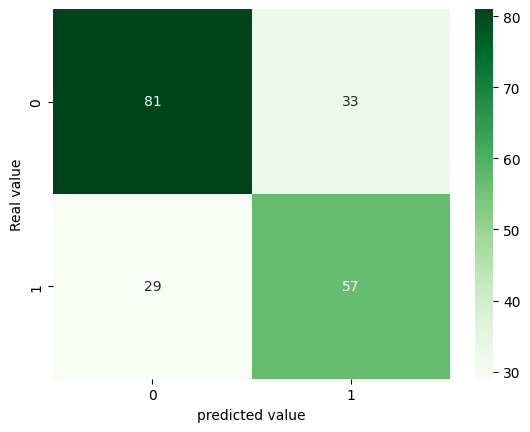

In [68]:
# Обучаем pipeline на тренировочных данных
gs_binary.fit(X_train, y_train)

# Делаем прогнозы на тестовых данных
y_pred = gs_binary.predict(X_test)

# Выводим метрики качества модели
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
sns.heatmap(confusion_matrix(y_test, y_pred),  annot=True, fmt="d", cmap='Greens')
plt.ylabel('Real value')
plt.xlabel('predicted value')

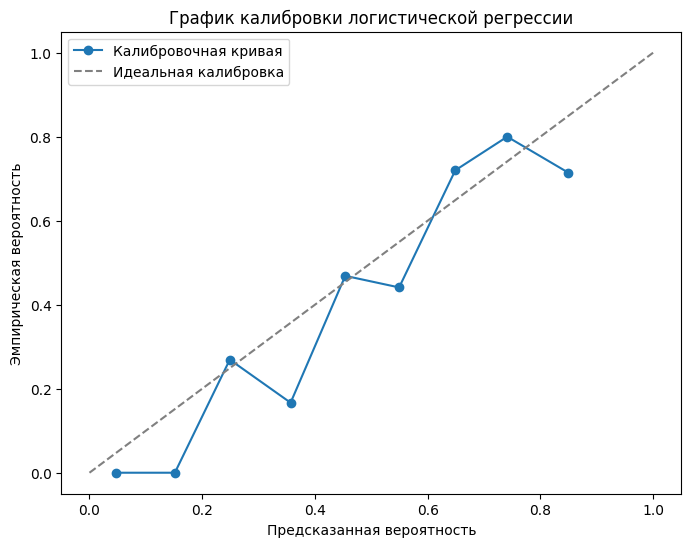

In [69]:
# Калибровочная кривая
y_proba_positive = y_proba[:, 1]  # Вероятности положительного класса
prob_true, prob_pred = calibration_curve(y_test, y_proba_positive, n_bins=10, strategy="uniform")

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Калибровочная кривая')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Идеальная калибровка')
plt.xlabel('Предсказанная вероятность')
plt.ylabel('Эмпирическая вероятность')
plt.title('График калибровки логистической регрессии')
plt.legend()

F1-мера на тестовой выборке: 0.7172403776325345
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       114
           1       0.70      0.62      0.65        86

    accuracy                           0.72       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.72      0.72       200



Text(0.5, 23.52222222222222, 'predicted value')

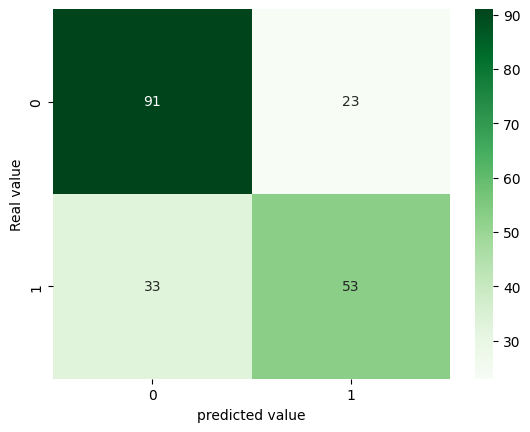

In [70]:
# Калибруем вероятности
model = gs_binary.best_estimator_
# Предсказываем вероятности
y_proba_positive = y_proba[:, 1]  # Вероятности положительного класса
calibrated_model = CalibratedClassifierCV(estimator=model, method='isotonic', cv='prefit')
calibrated_model.fit(X_test, y_test)
# Предсказанные вероятности после калибровки
calibrated_proba = calibrated_model.predict_proba(X_test)[:, 1]
# # Калибровочная кривая
prob_true, prob_pred = calibration_curve(y_test, calibrated_proba, n_bins=10, strategy="uniform")

y_pred_calibrated = calibrated_model.predict(X_test)
# Выводим метрики качества модели
print('F1-мера на тестовой выборке:', f1_score(y_test, y_pred_calibrated, average='weighted'))
print("Classification Report:")
print(classification_report(y_test, y_pred_calibrated))

# Матрица ошибок

sns.heatmap(confusion_matrix(y_test, y_pred_calibrated),  annot=True, fmt="d", cmap='Greens')
plt.ylabel('Real value')
plt.xlabel('predicted value')

In [71]:
# Предсказанные вероятности после калибровки
calibrated_proba = calibrated_model.predict_proba(X_test)


# Создание датафрейма для хранения результатов
results_df = pd.DataFrame({
    'RedFighter': data_binary['RedFighter'].iloc[:test_size],
    'BlueFighter': data_binary['BlueFighter'].iloc[:test_size],
    'ProbabilityRedWins': calibrated_proba [:, 0],
    'ProbabilityBlueWins': calibrated_proba [:, 1],
    'ActualWinner': data_binary['Result'].iloc[:test_size]
})

results_df['Predicted_Winner'] = (results_df['ProbabilityBlueWins'] > results_df['ProbabilityRedWins']).astype(int)
results_df['Prediction_Errors'] = np.abs(results_df['Predicted_Winner'] - results_df['ActualWinner'])
results_df.iloc[:30, :]

,RedFighter,BlueFighter,ProbabilityRedWins,ProbabilityBlueWins,ActualWinner,Predicted_Winner,Prediction_Errors
0,Alexandre Pantoja,Kai Asakura,1.000000,0.000000,0,0,0
1,Shavkat Rakhmonov,Ian Machado Garry,0.428571,0.571429,0,1,1
2,Ciryl Gane,Alexander Volkov,0.558824,0.441176,0,0,0
3,Bryce Mitchell,Kron Gracie,0.904762,0.095238,0,0,0
4,Nate Landwehr,Dooho Choi,0.558824,0.441176,1,0,1
5,Dominick Reyes,Anthony Smith,0.736842,0.263158,0,0,0
6,Vicente Luque,Themba Gorimbo,0.400000,0.600000,0,1,1
7,Movsar Evloev,Aljamain Sterling,0.736842,0.263158,0,0,0
8,Randy Brown,Bryan Battle,0.428571,0.571429,1,1,0
9,Chris Weidman,Eryk Anders,0.687500,0.312500,1,0,1


In [73]:
print(results_df['Prediction_Errors'].sum())

56


In [72]:
print(results_df['Prediction_Errors'].sum()/len(y_test))

0.28


In [74]:
171/500

0.342

In [75]:
df_test = pd.read_csv('datasets/UFC-fight-data_894.csv')
print(df_test.columns.to_list())

['BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_HomeTown', 'B_ID', 'B_Location', 'B_Name', 'B_Weight', 'B__Round1_Grappling_Reversals_Landed', 'B__Round1_Grappling_Standups_Landed', 'B__Round1_Grappling_Submissions_Attempts', 'B__Round1_Grappling_Takedowns_Attempts', 'B__Round1_Grappling_Takedowns_Landed', 'B__Round1_Strikes_Body Significant Strikes_Attempts', 'B__Round1_Strikes_Body Significant Strikes_Landed', 'B__Round1_Strikes_Body Total Strikes_Attempts', 'B__Round1_Strikes_Body Total Strikes_Landed', 'B__Round1_Strikes_Clinch Body Strikes_Attempts', 'B__Round1_Strikes_Clinch Body Strikes_Landed', 'B__Round1_Strikes_Clinch Head Strikes_Attempts', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 'B__Round1_Strikes_Clinch Leg Strikes_Attempts', 'B__Round1_Strikes_Clinch Leg Strikes_Landed', 'B__Round1_Strikes_Clinch Significant Kicks_Attempts', 'B__Round1_Strikes_Clinch Significant Kicks_Landed', 'B__Round1_Strikes_Clinch Significant Punches_Attempts', 'B__Round1_Strikes_Clinch Signific

In [76]:
df_test[df_test['B_Name'] == 'Petr Yan']

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
2198,0,0,25.0,170.0,Omsk Russia,3068,Krasnoyarsk Krai Russia,Petr Yan,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,blue
